# Compare responses of Llama2 and GPT4

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning) # Pandas complains about things that aren't really issues

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools as it
plt.rcParams["image.cmap"] = "viridis"

In [3]:
join_fields = [
    "kingdom",
    "phylum",
    "family",
    "genus",
    "specificepithet",
    "country",
    "stateprovince",
    "county",
    "target"
]

In [4]:
gpt4 = pd.read_csv("gpt4.tsv", sep="\t", index_col=0).set_index("query id")
llama = pd.read_csv("llama2.tsv", sep="\t", index_col=0).set_index("query id")
df = pd.merge(llama, gpt4, how="inner", on=join_fields, suffixes=["_l", "_g"])
df["correct_l"] = df["correct_l"].clip(0, 1)
df["correct_g"] = df["correct_g"].clip(0, 1)

In [5]:
training = df["kingdom"] == "plantae"
testing = df["kingdom"] == "animalia"

presence = df["target"] == 1
absence = ~presence

l_predicts_present = df["prediction_l"] == 1
l_predicts_absent = ~l_predicts_present

g_predicts_present = df["prediction_g"] == 1
g_predicts_absent = ~g_predicts_present

agree = df["prediction_l"] == df["prediction_g"]
disagree = ~agree

l_correct = df["correct_l"] == 1
l_incorrect = ~l_correct
g_correct = df["correct_g"] == 1
g_incorrect = ~g_correct

i = 0
def printi(s):
    global i
    i += 1
    print(f"{i:2d} {s}")

In [5]:
i = 0
m = df[testing]
printi("Llama2's overall accuracy: {:.2%}".format(m["correct_l"].mean()))
printi("Llama2's accuracy when GPT4 predicts presence: {:.2%}".format(m[g_predicts_present]["correct_l"].mean()))
printi("Llama2's accuracy when GPT4 predicts absence: {:.2%}".format(m[g_predicts_absent]["correct_l"].mean()))
printi("Llama2's accuracy when they disagree: {:.2%}".format(m[disagree]["correct_l"].mean()))
print()
printi("GPT4's overall accuracy: {:.2%}".format(m["correct_g"].mean()))
printi("GPT4's accuracy when Llama2 predicts presence: {:.2%}".format(m[l_predicts_present]["correct_g"].mean()))
printi("GPT4's accuracy when Llama2 predicts absence: {:.2%}".format(m[l_predicts_absent]["correct_g"].mean()))
printi("GPT4's accuracy when they disagree: {:.2%}".format(m[disagree]["correct_g"].mean()))
print()
printi("Accuracy when their predictions agree: {:.2%}".format(m[agree]["correct_l"].mean()))
print()
printi("Llama2's accuracy when it predicts presence: {:.2%}".format(m[l_predicts_present]["correct_l"].mean()))
printi("GPT4's accuracy when it predicts presence: {:.2%}".format(m[g_predicts_present]["correct_g"].mean()))
printi("Accuracy when both predict presence: {:.2%}".format(m[agree * l_predicts_present]["correct_l"].mean()))
print()
printi("Llama2's accuracy when it predicts absence: {:.2%}".format(m[l_predicts_absent]["correct_l"].mean()))
printi("GPT4's accuracy when it predicts absence: {:.2%}".format(m[g_predicts_absent]["correct_g"].mean()))
printi("Accuracy when both predict absence: {:.2%}".format(m[agree * l_predicts_absent]["correct_l"].mean()))
print()
printi("Llama2's accuracy when species is present: {:.2%}".format(m[presence]["correct_l"].mean()))
printi("Llama2's accuracy when species is absent: {:.2%}".format(m[absence]["correct_l"].mean()))
print()
printi("GPT4's accuracy when species is present: {:.2%}".format(m[presence]["correct_g"].mean()))
printi("GPT4's accuracy when species is absent: {:.2%}".format(m[absence]["correct_g"].mean()))
print()
printi("Llama2's accuracy when GPT4 is correct: {:.2%}".format(m[g_correct]["correct_l"].mean()))
printi("Llama2's accuracy when GPT4 is correct about presence: {:.2%}".format(m[g_correct * g_predicts_present]["correct_l"].mean()))
printi("Llama2's accuracy when GPT4 is correct about absence: {:.2%}".format(m[g_correct * g_predicts_absent]["correct_l"].mean()))
printi("Llama2's accuracy when GPT4 is incorrect: {:.2%}".format(m[g_incorrect]["correct_l"].mean()))
printi("Llama2's accuracy when GPT4 is incorrect about presence: {:.2%}".format(m[g_incorrect * g_predicts_present]["correct_l"].mean()))
printi("Llama2's accuracy when GPT4 is incorrect about absence: {:.2%}".format(m[g_incorrect * g_predicts_absent]["correct_l"].mean()))
print()
printi("GPT4's accuracy when Llama2 is correct: {:.2%}".format(m[l_correct]["correct_g"].mean()))
printi("GPT4's accuracy when Llama2 is correct about presence: {:.2%}".format(m[l_correct * l_predicts_present]["correct_g"].mean()))
printi("GPT4's accuracy when Llama2 is correct about absence: {:.2%}".format(m[l_correct * l_predicts_absent]["correct_g"].mean()))
printi("GPT4's accuracy when Llama2 is incorrect: {:.2%}".format(m[l_incorrect]["correct_g"].mean()))
printi("GPT4's accuracy when Llama2 is incorrect about presence: {:.2%}".format(m[l_incorrect * l_predicts_present]["correct_g"].mean()))
printi("GPT4's accuracy when Llama2 is incorrect about absence: {:.2%}".format(m[l_incorrect * l_predicts_absent]["correct_g"].mean()))

 1 Llama2's overall accuracy: 51.98%
 2 Llama2's accuracy when GPT4 predicts presence: 41.51%
 3 Llama2's accuracy when GPT4 predicts absence: 54.84%
 4 Llama2's accuracy when they disagree: 32.33%

 5 GPT4's overall accuracy: 63.25%
 6 GPT4's accuracy when Llama2 predicts presence: 64.79%
 7 GPT4's accuracy when Llama2 predicts absence: 62.72%
 8 GPT4's accuracy when they disagree: 67.67%

 9 Accuracy when their predictions agree: 61.18%

10 Llama2's accuracy when it predicts presence: 56.73%
11 GPT4's accuracy when it predicts presence: 84.33%
12 Accuracy when both predict presence: 86.15%

13 Llama2's accuracy when it predicts absence: 50.33%
14 GPT4's accuracy when it predicts absence: 57.49%
15 Accuracy when both predict absence: 58.01%

16 Llama2's accuracy when species is present: 28.40%
17 Llama2's accuracy when species is absent: 77.00%

18 GPT4's accuracy when species is present: 35.17%
19 GPT4's accuracy when species is absent: 93.06%

20 Llama2's accuracy when GPT4 is corre

In [6]:
randomly_correct = df.apply(lambda r: np.random.random() < (0.39734 if r["target"] == 1 else 0.707495), axis=1)
printi("GPT4's accuracy when a weighted coin is correct: {:.2%}".format(m[randomly_correct]["correct_g"].mean()))
printi("GPT4's accuracy when Llama2 is incorrect: {:.2%}".format(m[~randomly_correct]["correct_g"].mean()))

32 GPT4's accuracy when a weighted coin is correct: 71.43%
33 GPT4's accuracy when Llama2 is incorrect: 53.19%


In [7]:
i = 0
printi("Llama2's accuracy when GPT4=absence, Llama2=presence: {:.2%}".format(m[g_predicts_absent * l_predicts_present]["correct_l"].mean()))
printi("Llama2's accuracy when GPT4=presence, Llama2=absence: {:.2%}".format(m[g_predicts_present * l_predicts_absent]["correct_l"].mean()))
printi("GPT4's accuracy when GPT4=absence, Llama2=presence: {:.2%}".format(m[g_predicts_absent * l_predicts_present]["correct_g"].mean()))
printi("GPT4's accuracy when GPT4=presence, Llama2=absence: {:.2%}".format(m[g_predicts_present * l_predicts_absent]["correct_g"].mean()))

 1 Llama2's accuracy when GPT4=absence, Llama2=presence: 44.26%
 2 Llama2's accuracy when GPT4=presence, Llama2=absence: 16.68%
 3 GPT4's accuracy when GPT4=absence, Llama2=presence: 55.74%
 4 GPT4's accuracy when GPT4=presence, Llama2=absence: 83.32%


In [8]:
m[agree * l_predicts_present]["correct_g"].mean()

0.8615384615384616

In [9]:
m[disagree * l_predicts_present]["correct_g"].mean()

0.5573663624511083

In [31]:
len(m)

8471

In [29]:
sum(m["certainty_l"] > .7)

629

In [30]:
m[m["certainty_l"] > .7]["correct_l"].mean()

0.643879173290938

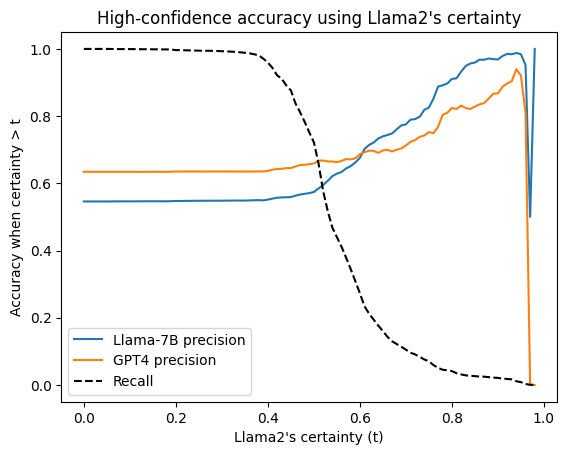

In [23]:
x = np.arange(0, .99, 0.01)
cl_y1 = np.array([m[m["certainty_l"] > t]["correct_l"].mean() for t in x])
cl_y2 = np.array([m[m["certainty_l"] > t]["correct_g"].mean() for t in x])
cl_r = np.array([len(m[m["certainty_l"] > t].index) / len(m) for t in x])

plt.plot(x, cl_y1, label="Llama-7B precision")
plt.plot(x, cl_y2, label="GPT4 precision")
plt.plot(x, cl_r, label="Recall", linestyle="--", color="black")

plt.title("High-confidence accuracy using Llama2's certainty")
plt.xlabel("Llama2's certainty (t)")
plt.ylabel("Accuracy when certainty > t")
plt.legend();

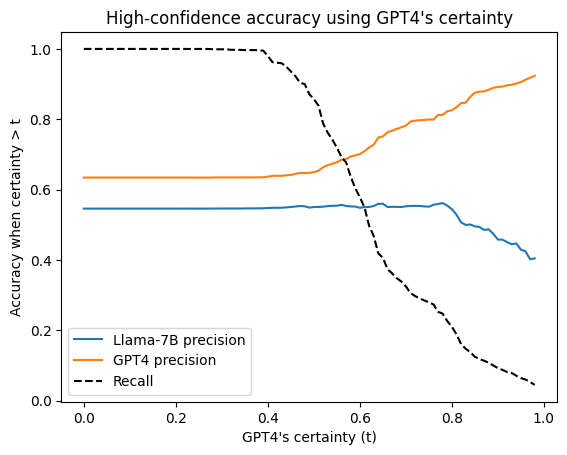

In [24]:
x = np.arange(0, .99, 0.01)
cg_y1 = np.array([m[m["certainty_g"] > t]["correct_l"].mean() for t in x])
cg_y2 = np.array([m[m["certainty_g"] > t]["correct_g"].mean() for t in x])
cg_r = np.array([len(m[m["certainty_g"] > t].index) / len(m) for t in x])

plt.plot(x, cg_y1, label="Llama-7B precision")
plt.plot(x, cg_y2, label="GPT4 precision")
plt.plot(x, cg_r, label="Recall", linestyle="--", color="black")

plt.title("High-confidence accuracy using GPT4's certainty")
plt.xlabel("GPT4's certainty (t)")
plt.ylabel("Accuracy when certainty > t")
plt.legend();

In [25]:
df["certainty_g"].to_numpy().reshape((1, -1)).shape

(1, 15100)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.isotonic import IsotonicRegression

def make_platt_conf_model(certainty: str | pd.Series, correct: str | pd.Series, subset: bool | pd.Series):
    if type(certainty) == str: certainty = df[certainty]
    if type(correct) == str: correct = df[correct]

    training_set = training * subset
    data = certainty[training_set].to_numpy().reshape((-1, 1))
    target = correct[training_set].to_numpy()
    lr = LogisticRegression().fit(data, target)
    return lambda x: lr.predict_proba(x.reshape(-1, 1))[:,1].reshape(x.shape)

def make_iso_conf_model(certainty: str | pd.Series, correct: str | pd.Series, subset: bool | pd.Series):
    if type(certainty) == str: certainty = df[certainty]
    if type(correct) == str: correct = df[correct]
    
    training_set = training * subset
    data = certainty[training_set].to_numpy().reshape((-1, 1))
    target = correct[training_set].to_numpy()
    ir = IsotonicRegression(out_of_bounds="clip").fit(data, target)
    return lambda x: ir.transform(x.reshape(-1, 1)).reshape(x.shape)

g_platt_conf_models = (
    make_platt_conf_model("certainty_l", "correct_g", True),
    make_platt_conf_model("certainty_g", "correct_g", True)
)

g_iso_conf_models = (
    make_iso_conf_model("certainty_l", "correct_g", True),
    make_iso_conf_model("certainty_g", "correct_g", True)
)

g_bleedthru_iso_conf_models = (
    lambda l: g_iso_conf_models[0](l) * .5 + l * .5,
    lambda g: g_iso_conf_models[1](g) * .5 + g * .5
)

g_iso_platt_conf_models = (
    lambda l: g_iso_conf_models[0](l) * .8 + g_platt_conf_models[0](l) * .2,
    lambda g: g_iso_conf_models[1](g) * .8 + g_platt_conf_models[1](g) * .2
)

passthru_conf_models = [lambda x: x] * 2

In [27]:
# plt.imshow(np.random.beta(a, b), **default_args["im_args"])

In [28]:
def make_heatmaps(correct, subset: pd.Series | bool, res=50, conf_ranges=None):
    heatmap_correct, _, _ = np.histogram2d(df[correct * subset]["certainty_l"], df[correct * subset]["certainty_g"], bins=res, range=conf_ranges)
    heatmap_incorrect, _, _ = np.histogram2d(df[~correct * subset]["certainty_l"], df[~correct * subset]["certainty_g"], bins=res, range=conf_ranges)
    return (heatmap_correct, heatmap_incorrect)

def grid2d(range_l, range_u, res):
    return np.array(np.meshgrid(np.linspace(range_l, range_u, res), np.linspace(range_l, range_u, res))[::-1])

def get_intermediates(
        correct,
        subset,
        base_bin_counts,
        conf_range,
        conf_models,
        kernel,
        prior_mean,
        prior_weights,
        prior_power,
        data_res,
        render_res,
        **unused_args
    ):
    res = data_res
    kernel = np.array(kernel) * res

    blip = .5 / res
    range_l = conf_range[0] + blip
    range_u = conf_range[1] - blip
    cert_grid = grid2d(range_l, range_u, res)
    cert_render_grid = grid2d(range_l, range_u, render_res)

    train_subset = training * subset
    binned_correct, binned_incorrect = make_heatmaps(correct, train_subset, res, ((conf_range), (conf_range)))
    binned_correct = sp.ndimage.gaussian_filter(binned_correct, kernel, mode="nearest", radius=20) * res
    binned_incorrect = sp.ndimage.gaussian_filter(binned_incorrect, kernel, mode="nearest", radius=20) * res

    # prior_correct = cert_grid[0] * prior_weights[0] + cert_grid[1] * prior_weights[1] # sum(correct * train_subset) / (sum(correct * train_subset) + sum(~correct * train_subset))
    marginal_conf_grid = np.array((conf_models[0](cert_grid[0]), conf_models[1](cert_grid[1])))

    if prior_mean == "arithmetic":
        prior_correct = marginal_conf_grid[0] * prior_weights[0] + marginal_conf_grid[1] * prior_weights[1]
    elif prior_mean == "geometric":
        prior_correct = sp.stats.gmean(marginal_conf_grid.reshape(2, -1).T, axis=1, weights=prior_weights)\
            .reshape(res, res)
    else:
        prior_correct = np.array([])
    
    if prior_power != 1:
        prior_correct = np.power(prior_correct, prior_power)
    
    prior_incorrect = 1 - prior_correct
    prior_correct_density = base_bin_counts * prior_correct
    prior_incorrect_density = base_bin_counts * prior_incorrect
    correct_density = prior_correct_density + binned_correct
    incorrect_density = prior_incorrect_density + binned_incorrect
    conf = correct_density / (correct_density + incorrect_density)

    return (
        prior_correct_density,
        prior_incorrect_density,
        binned_correct,
        binned_incorrect,
        correct_density,
        incorrect_density,
        cert_grid,
        cert_render_grid,
        conf,
    )

In [29]:
import scipy as sp
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingRegressor

def train_mono_conf2d_from_intermediates(
        data_res,
        conf_range,
        cert_grid,
        correct_density,
        incorrect_density,
        cert_render_grid,
        train_iterations,
        **unused_args
    ) -> HistGradientBoostingRegressor:
    blip = .5 / data_res
    range_l = conf_range[0] + blip
    range_u = conf_range[1] - blip
    grid_axes = [np.linspace(range_l, range_u, data_res)] * 2
    a = sp.interpolate.interpn(points=grid_axes, values=correct_density, xi=np.dstack(tuple(cert_render_grid)))
    b = sp.interpolate.interpn(points=grid_axes, values=incorrect_density, xi=np.dstack(tuple(cert_render_grid)))
    conf_grid = np.random.beta(a, b, a.shape)
    
    return HistGradientBoostingRegressor(
        loss="squared_error",
        l2_regularization=0,
        early_stopping=True,
        min_samples_leaf=1,
        max_iter=train_iterations,
        monotonic_cst=np.array([1, 1], dtype=int)
    ).fit(np.dstack(cert_grid).reshape(-1, 2), np.array(conf_grid.flatten()))

def train_mono_conf2d(correct, subset, **args) -> HistGradientBoostingRegressor:
    (_, _, _, _, correct_density, incorrect_density, cert_grid, cert_render_grid, _) = get_intermediates(correct, subset, **args)
    return train_mono_conf2d_from_intermediates(
        cert_grid=cert_grid,
        correct_density=correct_density,
        incorrect_density=incorrect_density,
        cert_render_grid=cert_render_grid,
        **args
    )


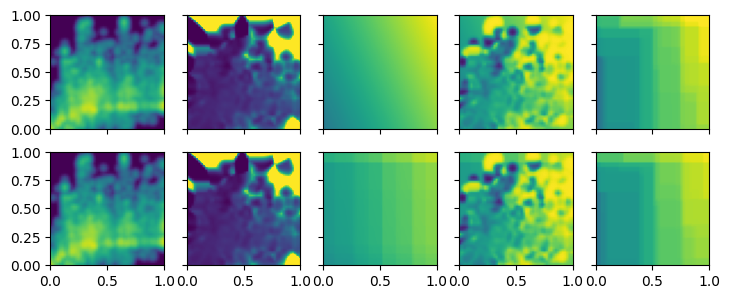

In [30]:
def plot_stuff(
        axes,
        correct: pd.Series,
        subset: pd.Series | bool,
        base_bin_counts=1,
        conf_range=(0, 1),
        conf_models=[lambda x: x] * 2,
        kernel=(1, 1),
        prior_mean="arithmetic",
        prior_weights=(0.1, 0.9),
        prior_power=1,
        data_res=50,
        render_res=200,
        train_iterations=1000,
        plot_axes={
            "bin_count": 0,
            "bin_accuracy": 1,
            "mono_certainty": 2
        },
        im_args={}
    ):
    
    (
        prior_correct_density,
        prior_incorrect_density,
        binned_correct,
        binned_incorrect,
        correct_density,
        incorrect_density,
        cert_grid,
        cert_render_grid,
        conf,
    ) = get_intermediates(
        correct,
        subset,
        base_bin_counts,
        conf_range,
        conf_models,
        kernel,
        prior_mean,
        prior_weights,
        prior_power,
        data_res,
        render_res,
    )

    if (ax := plot_axes.get("bin_prior")) != None:
        bin_prior = prior_correct_density / (prior_correct_density + prior_incorrect_density)
        axes[ax].imshow(bin_prior, vmin=0, vmax=1, **im_args)

    if (ax := plot_axes.get("bin_llr")) != None:
        llr = np.log(1 + binned_correct / binned_incorrect)
        axes[ax].imshow(llr, vmin=0, vmax=7, **im_args)

    if (ax := plot_axes.get("bin_count")) != None:
        binned_total = np.log(1 + binned_correct + binned_incorrect)
        axes[ax].imshow(binned_total, vmin=0, vmax=8, **im_args)

    if (ax := plot_axes.get("bin_accuracy")) != None:
        axes[ax].imshow(conf, vmin=0, vmax=1, **im_args)

    # Learn 2d certainty as monotone transformation of conf over certainty_l x certainty_g
    # Add beta noise to certainty coordinates
    if "mono_certainty" in plot_axes:
        conf2_model = train_mono_conf2d_from_intermediates(
            data_res,
            conf_range,
            cert_grid,
            correct_density,
            incorrect_density,
            cert_render_grid,
            train_iterations
        )
        
        cert2 = conf2_model.predict(cert_render_grid.reshape(2, -1).T).reshape(render_res, render_res)
        axes[plot_axes["mono_certainty"]].imshow(cert2, vmin=0, vmax=1, **im_args)

    # Learn 2d certainty directly from samples instead of joint distributions
    # This is problematic because it doesn't use our priors
    # if "sample_certainty" in plot_axes:
    #     m = df[training * subset].sample(1000, replace=True)
    #     xgboost = HistGradientBoostingClassifier(
    #         loss="log_loss",
    #         l2_regularization=0,
    #         early_stopping=False,
    #         min_samples_leaf=1,
    #         max_iter=1000,
    #         monotonic_cst=np.array([1, 1], dtype=int)
    #     ).fit(m[["certainty_l", "certainty_g"]].to_numpy(), m["correct_g"].to_numpy())

    #     cert2 = xgboost.predict_proba(cert_render_grid)[:,1].reshape(render_res, render_res)
    #     axes[plot_axes["sample_certainty"]].imshow(cert2, vmin=0, vmax=1, **im_args)

default_args = args = {
    "kernel": [.02] * 2,
    "base_bin_counts": 1,
    "conf_range": (0.4, 1),
    "conf_models": g_iso_platt_conf_models,
    "data_res": 50,
    "render_res": 50,
    "train_iterations": 1000,
    "prior_mean": "arithmetic",
    # "prior_weights": (0.5, 1.0),
    "prior_weights": (0.3, 0.7),
    "prior_power": 1,
    "plot_axes": {
        "bin_count": 0,
        "bin_accuracy": 1,
        "mono_certainty": 2
    },
    "im_args": {
        "extent": [0, 1, 0, 1],
        "origin": "lower",
        "cmap": "viridis"
    }
}

args = (default_args |
        {"plot_axes": {
            "bin_count": 0,
            "bin_llr": 1,
            "bin_prior": 2,
            "bin_accuracy": 3,
            "mono_certainty": 4
        }})

r, c = 2, 5
fig, ax = plt.subplots(r, c, figsize=(1.5*c + 1, 1.5*r + .25), sharex=True, sharey=True, squeeze=False)
plot_stuff(ax[0], g_correct, True, **(args | {"conf_models": passthru_conf_models}))
plot_stuff(ax[1], g_correct, True, **(args | {"conf_models": g_iso_platt_conf_models}))

In [31]:
def get_prec_recall(correct, conf_scores, subset=True):
    subset = testing * subset
    skip = max(1, int(len(conf_scores) / 1000))
    thresholds = np.sort(conf_scores[subset][::skip])
    prec_g = np.array([correct[subset * (conf_scores > t)].mean() for t in thresholds])
    recall = np.array([len(correct[subset * (conf_scores > t)]) / len(correct[subset]) for t in thresholds])

    return (thresholds, prec_g, recall)

In [32]:
conf2d_model = train_mono_conf2d(g_correct, True, **default_args)
conf2d = conf2d_model.predict(df[["certainty_l", "certainty_g"]])

In [33]:
def make_subset_iso_platt_conf_models(subset, correct="correct_g"):
    g_platt_conf_models = (make_platt_conf_model("certainty_l", correct, subset),
                           make_platt_conf_model("certainty_g", correct, subset))
    
    g_iso_conf_models = (make_iso_conf_model("certainty_l", correct, subset),
                         make_iso_conf_model("certainty_g", correct, subset))
    
    return (lambda l: g_iso_conf_models[0](l) * .8 + g_platt_conf_models[0](l) * .2,
            lambda g: g_iso_conf_models[1](g) * .8 + g_platt_conf_models[1](g) * .2)

def train_mono_conf2d_recalibrated(subset, correct="correct_g", **args):
    conf_models = make_subset_iso_platt_conf_models(subset, correct)
    return train_mono_conf2d(g_correct, subset, **(args | {"conf_models": conf_models}))

def get_mono_conf2d_recalibrated(subset, name, correct="correct_g", **args):
    conf2d_model = train_mono_conf2d_recalibrated(subset, correct, **args)
    return pd.Series(conf2d_model.predict(df[["certainty_l", "certainty_g"]]), name=name, index=df.index)

conf2d_absent = get_mono_conf2d_recalibrated(l_predicts_absent, "conf2d_absent", **args)
conf2d_present = get_mono_conf2d_recalibrated(l_predicts_present, "conf2d_present", **args)

pred_and_conf = pd.DataFrame((df["prediction_l"], conf2d_absent, conf2d_present))
decision_map = {
    -1: "conf2d_absent",
    1: "conf2d_present"
}

hier_conf2d = pred_and_conf.apply(lambda r: r[decision_map[r["prediction_l"]]])

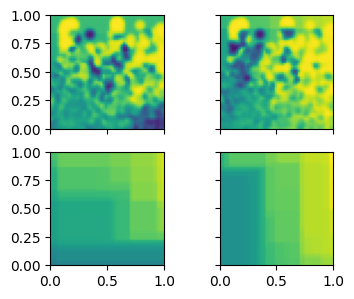

In [34]:
r, c = 2, 2
fig, ax = plt.subplots(r, c, figsize=(1.5*c + 1, 1.5*r + .25), sharex=True, sharey=True)
row = it.count()
axes=(a for a in ax.T)

args = default_args | {
    "conf_range": (0.5, 1.0),
    "plot_axes": {
        "bin_accuracy": next(row),
        "mono_certainty": next(row)
    }
}

subset = True
l_conf_models = make_subset_iso_platt_conf_models(subset, df["correct_l"])
plot_stuff(next(axes), l_correct, subset, **(args | {"conf_models": l_conf_models}))

g_conf_models = make_subset_iso_platt_conf_models(subset, df["correct_g"])
plot_stuff(next(axes), g_correct, subset, **(args | {"conf_models": g_conf_models}))

In [35]:
conf2d_absent = get_mono_conf2d_recalibrated(l_predicts_absent, "conf2d_absent", **args)
conf2d_present = get_mono_conf2d_recalibrated(l_predicts_present, "conf2d_present", **args)

pred_and_conf = pd.DataFrame((df["prediction_l"], conf2d_absent, conf2d_present))
decision_map = {
    -1: "conf2d_absent",
    1: "conf2d_present"
}

hier_conf2d = pred_and_conf.apply(lambda r: r[decision_map[r["prediction_l"]]])

In [36]:
# l_conf2d_model = train_mono_conf2d(l_correct, subset, **default_args)
# l_conf2d = l_conf2d_model.predict(df[["certainty_l", "certainty_g"]]).clip(0, 1)

# g_conf2d_model = train_mono_conf2d(g_correct, subset, **default_args)
# g_conf2d = g_conf2d_model.predict(df[["certainty_l", "certainty_g"]]).clip(0, 1)

l_conf2d = df["certainty_l"]
g_conf2d = df["certainty_g"] * 1.08

choose_l = (l_conf2d > g_conf2d)
best_conf2d_correct = df["correct_l"] * choose_l + df["correct_g"] * ~choose_l
best_conf2d = l_conf2d * choose_l + g_conf2d * ~choose_l

best_conf2d_correct.mean()

0.6468211920529802

In [37]:
df["correct_g"].mean()

0.6350331125827815

In [38]:
best_conf2d_correct.mean()

0.6468211920529802

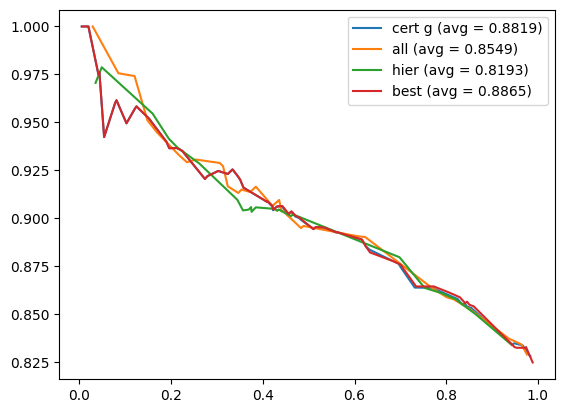

In [39]:
def plot(recall, prec, label):
    min_recall = 0.001
    c = (recall > min_recall)
    range_size = 1 - min_recall
    recall = recall[c]
    prec = prec[c]
    plt.plot(recall, prec, label=f"{label} (avg = {-np.trapz(prec, recall)/range_size:.4f})")

s = l_predicts_present * g_predicts_present
t, prec, recall = get_prec_recall(df["correct_g"], df["certainty_g"], s)
plot(recall, prec, "cert g")

t, prec, recall = get_prec_recall(df["correct_g"], conf2d, s)
plot(recall, prec, "all")

t, prec, recall = get_prec_recall(df["correct_g"], hier_conf2d, s)
plot(recall, prec, "hier")

t, prec, recall = get_prec_recall(best_conf2d_correct, best_conf2d, s)
plot(recall, prec, "best")

# plt.ylim(0.8, 1)
plt.legend();

NameError: name 'conf_models' is not defined

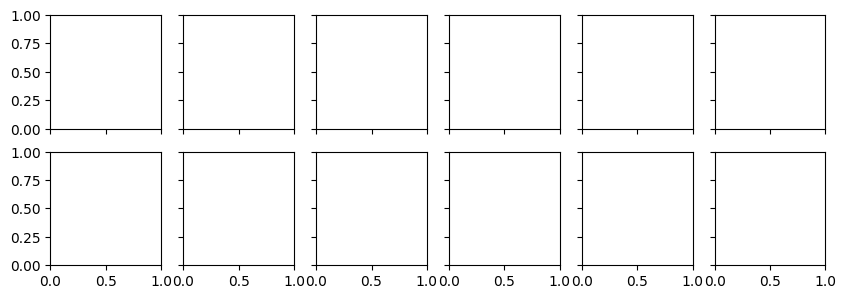

In [40]:
def plot(axes, args):
    for subset in [
        True,
        l_predicts_absent * g_predicts_absent,
        l_predicts_present * g_predicts_present,
    ]:
        l_conf_models = make_subset_iso_platt_conf_models(subset, "correct_l")
        plot_stuff(next(axes), l_correct, subset, **(args | {"conf_models": conf_models}))

        g_conf_models = make_subset_iso_platt_conf_models(subset, "correct_g")
        plot_stuff(next(axes), g_correct, subset, **(args | {"conf_models": conf_models}))

        combined_conf_models

r, c = 2, 6
fig, ax = plt.subplots(r, c, figsize=(1.5*c + 1, 1.5*r + .25), sharex=True, sharey=True)
row = it.count()

args = default_args | {
    "conf_range": (0.5, 1.0),
    "plot_axes": {
        "bin_accuracy": next(row),
        "mono_certainty": next(row)
    }
}

plot(axes=(a for a in ax.T), args=args)

plt.show()

In [ ]:
# t_cert_g, prec_g_cert_g, recall_cert_g = get_prec_recall(df["certainty_g"])
# t_all, prec_g_all, recall_all = get_prec_recall(conf2d)
# t_hier, prec_g_hier, recall_hier = get_prec_recall(hier_conf2d)

# plt.plot(t_cert_g, prec_g_cert_g, label="GPT4 precision (cert g)")
# plt.plot(t_all, prec_g_all, label="GPT4 precision (all)")
# plt.plot(t_hier, prec_g_hier, label="GPT4 precision (hier)")

# plt.title("High-confidence accuracy using GPT4's certainty")
# plt.xlabel("Certainty threshold (t)")
# plt.ylabel("Accuracy when certainty > t")
# plt.ylim(0.6, 1)
# plt.legend();

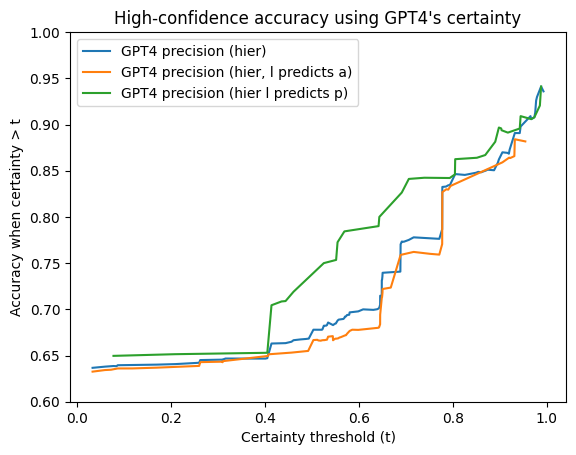

In [ ]:
t, prec, recall = get_prec_recall(df["correct_g"], hier_conf2d)
plt.plot(t, prec, label="GPT4 precision (hier)")

t, prec, recall = get_prec_recall(df["correct_g"], hier_conf2d, l_predicts_absent)
plt.plot(t, prec, label="GPT4 precision (hier, l predicts a)")

t, prec, recall = get_prec_recall(df["correct_g"], hier_conf2d, l_predicts_present)
plt.plot(t, prec, label="GPT4 precision (hier l predicts p)")

plt.title("High-confidence accuracy using GPT4's certainty")
plt.xlabel("Certainty threshold (t)")
plt.ylabel("Accuracy when certainty > t")
plt.ylim(0.6, 1)
plt.legend();

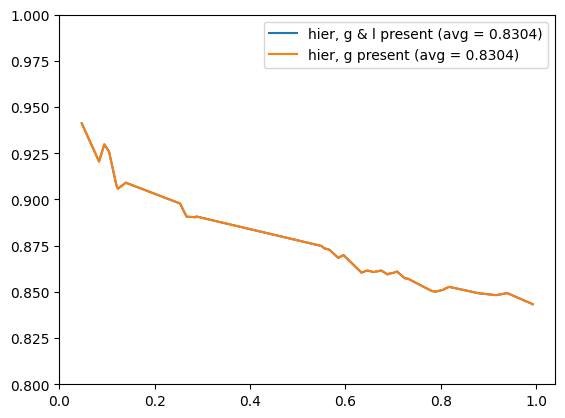

In [ ]:
def plot(recall, prec, label):
    min_recall = 0.001
    c = (recall > min_recall)
    range_size = 1 - min_recall
    recall = recall[c]
    prec = prec[c]
    plt.plot(recall, prec, label=f"{label} (avg = {-np.trapz(prec, recall)/range_size:.4f})")

# plot(recall_hier, prec_g_hier, "hier")
# # plot(recall_hier_old, prec_g_hier_old, "hier old")
# plot(recall_all, prec_g_all, "all")
# plot(recall_cert_g, prec_g_cert_g, "g")
# # plot(recall_cert_g, prec_g_cert_g, "cert")

# t, prec, recall = get_prec_recall(hier_conf2d)
# plot(recall, prec, "hier")

s = g_predicts_present
# s = l_predicts_present * df["certainty_l"] > .8
# s = l_predicts_absent * g_predicts_absent
# t, prec, recall = get_prec_recall(df["certainty_g"], s)
# plot(recall, prec, "cert_g, present")

# t, prec, recall = get_prec_recall(conf2d, s)
# plot(recall, prec, "all, present")

t, prec, recall = get_prec_recall(df["correct_g"], hier_conf2d, s)
plot(recall, prec, "hier, g & l present")

s = g_predicts_present
t, prec, recall = get_prec_recall(df["correct_g"], hier_conf2d, s)
plot(recall, prec, "hier, g present")

# t, prec, recall = get_prec_recall(hier_conf2d, l_predicts_present)
# plot(recall, prec, "hier, present")

# t, prec, recall = get_prec_recall(conf2d, l_predicts_present)
# plot(recall, prec, "all, present")

plt.ylim(0.8, 1)
plt.legend();

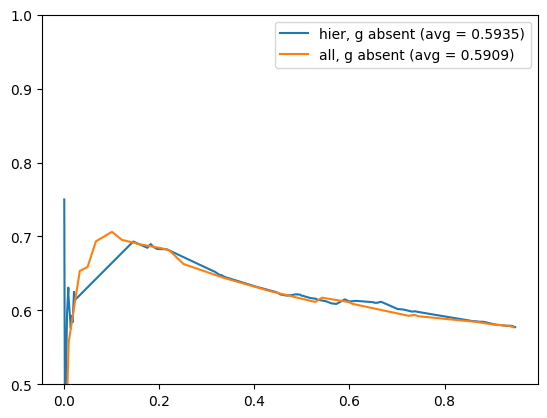

In [ ]:
t, prec, recall = get_prec_recall(df["correct_g"], hier_conf2d, g_predicts_absent)
plot(recall, prec, "hier, g absent")

t, prec, recall = get_prec_recall(df["correct_g"], conf2d, g_predicts_absent)
plot(recall, prec, "all, g absent")

plt.ylim(0.5, 1)
plt.legend();

In [ ]:
# # plt.plot(t_all, prec_l_all, label="Llama-7B precision")
# plt.plot(t_all, prec_g_all, label="GPT4 precision")
# plt.plot(t_all, recall_all, label="Recall", linestyle="--", color="black")

# plt.title("High-confidence accuracy using certainties of both")
# plt.xlabel("GPT4's certainty (t)")
# plt.ylabel("Accuracy when certainty > t")
# plt.legend();

NameError: name 't_all' is not defined

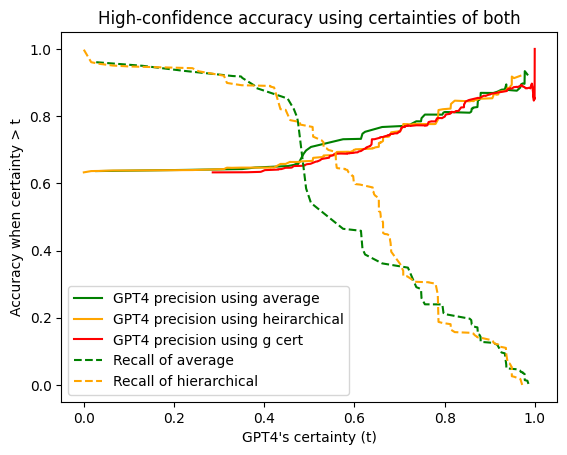

In [ ]:
# plt.plot(t_all, prec_g_all, label="GPT4 precision using average", color="green")
# plt.plot(t_hier, prec_g_hier, label="GPT4 precision using heirarchical", color="orange")
# plt.plot(t_cert_g, prec_g_cert_g, label="GPT4 precision using g cert", color="red")
# plt.plot(t_all, recall_all, label="Recall of average", linestyle="--", color="green")
# plt.plot(t_hier, recall_hier, label="Recall of hierarchical", linestyle="--", color="orange")

# plt.title("High-confidence accuracy using certainties of both")
# plt.xlabel("GPT4's certainty (t)")
# plt.ylabel("Accuracy when certainty > t")
# plt.legend();

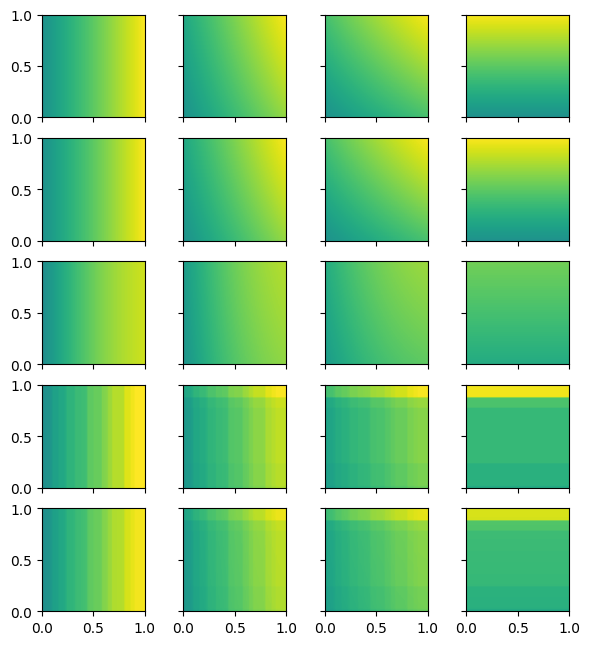

In [ ]:
args = default_args | {"conf_range": (0.5, 1)}
r, c = 5, 4
fig, ax = plt.subplots(r, c, figsize=(1.5*c + 1, 1.5*r + .25), sharex=True, sharey=True, squeeze=False)
axes = (a for a in ax.T)
for i, w in enumerate([0.0, .25, 0.5, 1.0]):
    a = next(axes)
    row = it.count()
    iargs = args | {"prior_weights": (w, 1 - w)}
    plot_stuff(a, g_correct, False, **(iargs | {
        "plot_axes": {"bin_accuracy": next(row)},
        "conf_models": passthru_conf_models
    }))
    plot_stuff(a, g_correct, False, **(iargs | {
        "prior_mean": "geometric",
        "prior_power": 1,
        "plot_axes": {"bin_accuracy": next(row)},
        "conf_models": passthru_conf_models
    }))
    plot_stuff(a, g_correct, False, **(iargs | {
        "plot_axes": {"bin_accuracy": next(row)},
        "conf_models": g_platt_conf_models
    }))
    plot_stuff(a, g_correct, False, **(iargs | {
        "plot_axes": {"bin_accuracy": next(row)},
        "conf_models": g_iso_conf_models
    }))
    plot_stuff(a, g_correct, False, **(iargs | {
        "plot_axes": {"bin_accuracy": next(row)},
        "conf_models": g_iso_platt_conf_models
    }))

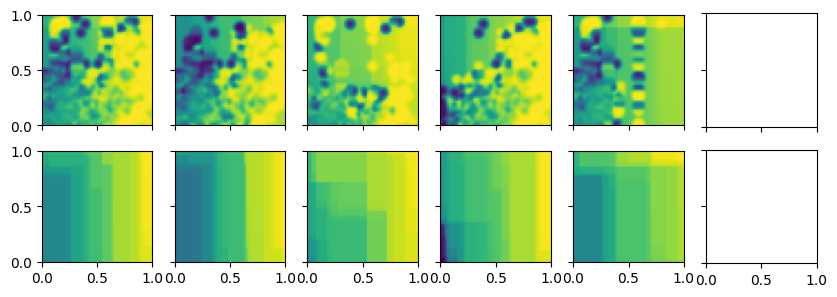

In [ ]:
def plot(axes, args):
    # plot_stuff(next(axes), l_correct, True, **args)
    for subset in [
        True,
        l_predicts_present,
        l_predicts_absent,
        g_predicts_present,
        g_predicts_absent,
        # l_predicts_present * g_predicts_present,
        # l_predicts_absent * g_predicts_absent
    ]:
        conf_models = make_subset_iso_platt_conf_models(subset)
        plot_stuff(next(axes), g_correct, subset, **(args | {"conf_models": conf_models}))

    # plot_stuff(next(axes), g_correct, True, **args)
    # # plot_stuff(next(axes), g_correct, l_correct, **args)
    # # plot_stuff(next(axes), g_correct, l_incorrect, **args)
    # plot_stuff(next(axes), g_correct, l_predicts_present, **args)
    # plot_stuff(next(axes), g_correct, l_predicts_absent, **args)
    # plot_stuff(next(axes), g_correct, l_predicts_present * g_predicts_present, **args)
    # plot_stuff(next(axes), g_correct, l_predicts_absent * g_predicts_absent, **(args)

r, c = 2, 6
fig, ax = plt.subplots(r, c, figsize=(1.5*c + 1, 1.5*r + .25), sharex=True, sharey=True)
row = it.count()

args = default_args | {
    "conf_range": (0.5, 1.0),
    "plot_axes": {
        "bin_accuracy": next(row),
        "mono_certainty": next(row)
    }
}

plot(axes=(a for a in ax.T), args=args)

plt.show()

In [ ]:
df["certainty_l"].corr(df["certainty_g"])

0.28454629258240044

In [ ]:
df[testing * (df["certainty_l"] > df["certainty_g"] * 1.5)][["correct_l", "correct_g"]].mean()

correct_l    0.804878
correct_g    0.737805
dtype: float64

In [ ]:
df[(df["certainty_l"] > .9)]["correct_g"].mean()

0.8679867986798679

In [ ]:
df[g_predicts_present * l_predicts_present * (df["certainty_l"] > .8)]["correct_g"].mean()

0.9533333333333334

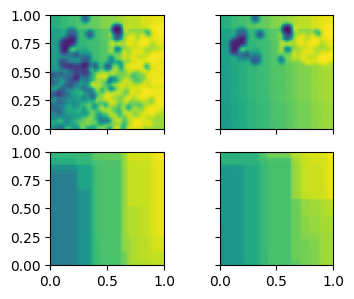

In [ ]:
def plot(axes, args):
    plot_stuff(next(axes), g_correct, l_predicts_present, **args)
    plot_stuff(next(axes), g_correct, l_predicts_present * (df["certainty_l"] > .8), **args)

r, c = 2, 2
fig, ax = plt.subplots(r, c, figsize=(1.5*c + 1, 1.5*r + .25), sharex=True, sharey=True)
row = it.count()

args = default_args | {
    "conf_range": (0.5, 1.0),
    "plot_axes": {
        "bin_accuracy": next(row),
        "mono_certainty": next(row)
    }
}

plot(axes=(a for a in ax.T), args=args)

plt.show()

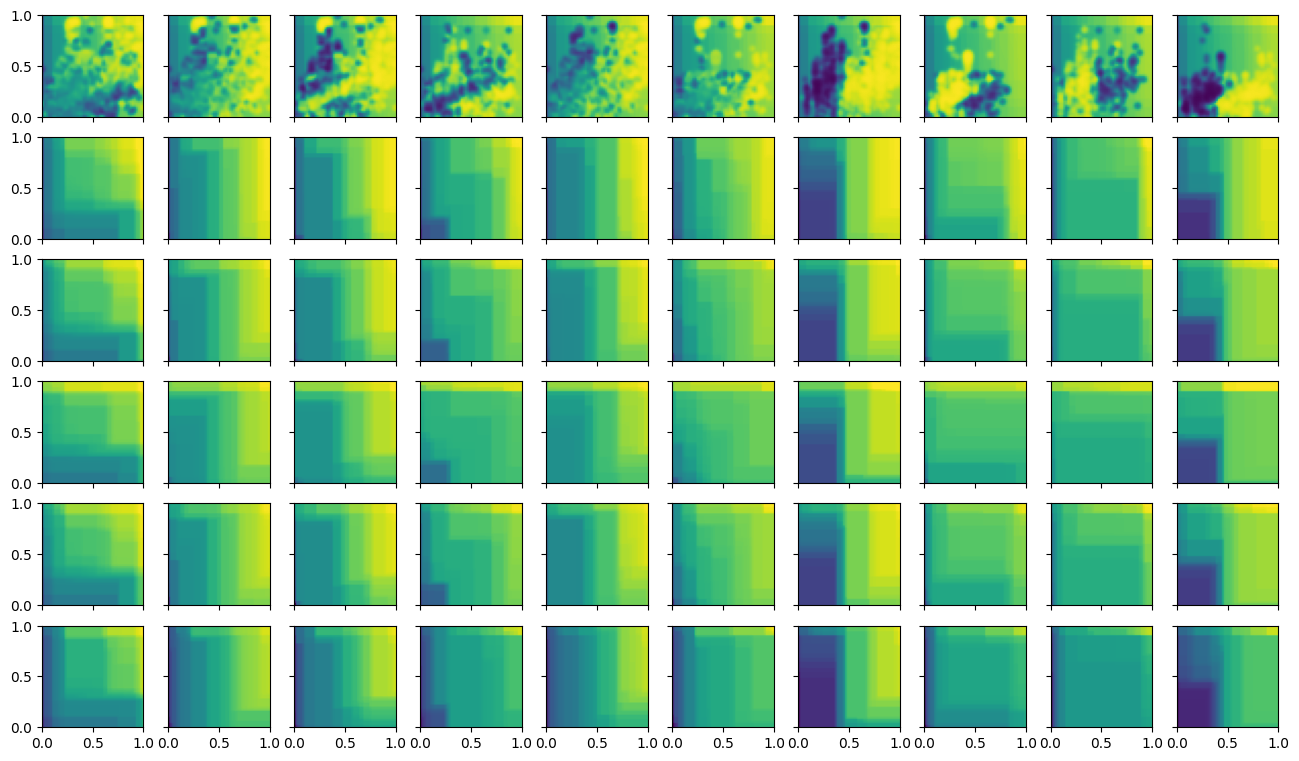

In [ ]:
def plot(axes, args):
    plot_stuff(next(axes), l_correct, True, **args)
    plot_stuff(next(axes), g_correct, True, **args)
    plot_stuff(next(axes), g_correct, l_correct, **args)
    plot_stuff(next(axes), g_correct, l_incorrect, **args)
    plot_stuff(next(axes), g_correct, l_predicts_present, **args)
    plot_stuff(next(axes), g_correct, l_predicts_absent, **args)
    plot_stuff(next(axes), g_correct, l_predicts_present * l_correct, **args)
    plot_stuff(next(axes), g_correct, l_predicts_absent * l_correct, **args)
    plot_stuff(next(axes), g_correct, l_predicts_present * l_incorrect, **args)
    plot_stuff(next(axes), g_correct, l_predicts_absent * l_incorrect, **args)

r, c = 6, 10
fig, ax = plt.subplots(r, c, figsize=(1.5*c + 1, 1.5*r + .25), sharex=True, sharey=True)
row = it.count()

args = default_args | {
    "base_bin_counts": 10,
}

plot(axes=(a for a in ax.T), args=args | {"plot_axes": {"bin_accuracy": next(row)}})
plot(axes=(a for a in ax.T), args=args | {"prior_weights": (0.1, 0.9), "plot_axes": {"mono_certainty": next(row)}})
plot(axes=(a for a in ax.T), args=args | {"prior_weights": (0.5, 0.5), "plot_axes": {"mono_certainty": next(row)}})
plot(axes=(a for a in ax.T), args=args | {"prior_weights": (0.9, 0.1), "plot_axes": {"mono_certainty": next(row)}})

plot(
    axes=(a for a in ax.T),
    args=args | {
        "prior_weights": (1.0, 1.0),
        "prior_mean": "geometric",
        "plot_axes": {"mono_certainty": next(row)}
    }
)

plot(
    axes=(a for a in ax.T),
    args=args | {
        "prior_weights": (1.0, 1.0),
        "prior_mean": "geometric",
        "prior_power": 2,
        "plot_axes": {"mono_certainty": next(row)}
    }
)

plt.show()

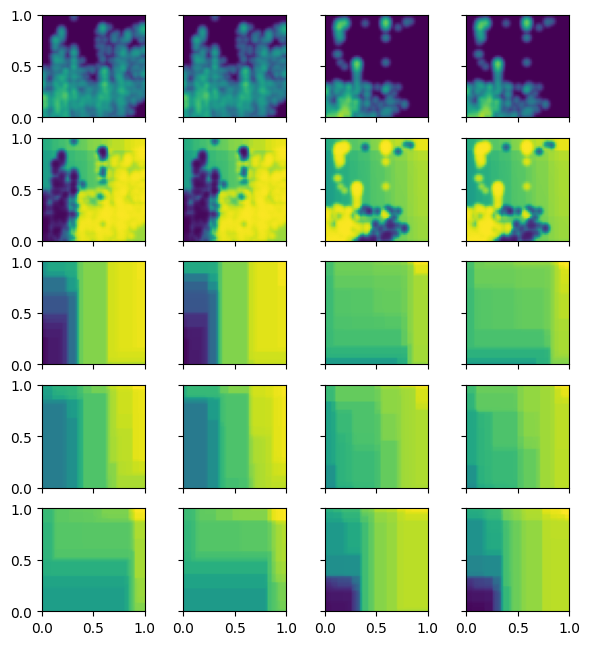

In [ ]:
r, c = 5, 4
fig, ax = plt.subplots(r, c, figsize=(1.5*c + 1, 1.5*r + .25), sharex=True, sharey=True)
row = it.count()

args = default_args | {
    "plot_axes": {},
    "conf_range": (.5, 1)
}

args1 = args | {"prior_mean": "geometric", "prior_weights": (1.0, 1.0)}
args2 = args | {"prior_mean": "arithmetic", "prior_weights": (.2, 8)}

def plot(ax, row, subset, args1, args2):
    axes=(a for a in ax.T)
    args1 |= {"plot_axes": args1["plot_axes"] | {"mono_certainty": row}}
    args2 |= {"plot_axes": args2["plot_axes"] | {"mono_certainty": row}}
    plot_stuff(next(axes), g_correct, l_predicts_present * subset, **args1)
    plot_stuff(next(axes), g_correct, l_predicts_present * subset, **args2)
    plot_stuff(next(axes), g_correct, l_predicts_absent * subset, **args1)
    plot_stuff(next(axes), g_correct, l_predicts_absent * subset, **args2)

row = it.count()
first_args = {"plot_axes": {"bin_count": next(row), "bin_accuracy": next(row)}}
plot(ax, next(row), l_correct, args1=args|first_args, args2=args|first_args)
plot(ax, next(row), True, args1=args, args2=args)
plot(ax, next(row), l_incorrect, args1=args, args2=args)

plt.show()

StopIteration: 

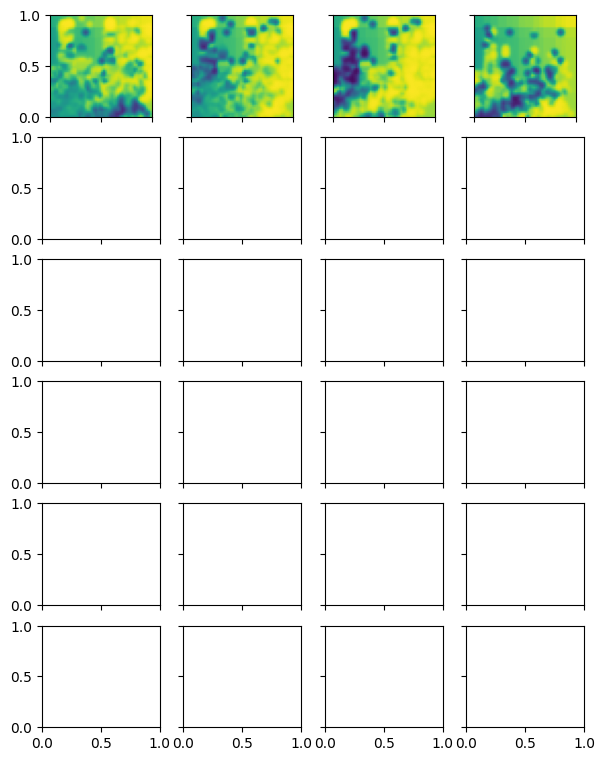

In [ ]:
def plot(axes, args):
    plot_stuff(next(axes), l_correct, True, **args)
    plot_stuff(next(axes), g_correct, True, **args)
    plot_stuff(next(axes), g_correct, l_correct, **args)
    plot_stuff(next(axes), g_correct, l_incorrect, **args)
    plot_stuff(next(axes), g_correct, l_predicts_present, **args)
    plot_stuff(next(axes), g_correct, l_predicts_absent, **args)
    plot_stuff(next(axes), g_correct, l_predicts_present * l_correct, **args)
    plot_stuff(next(axes), g_correct, l_predicts_absent * l_correct, **args)
    plot_stuff(next(axes), g_correct, l_predicts_present * l_incorrect, **args)
    plot_stuff(next(axes), g_correct, l_predicts_absent * l_incorrect, **args)

r, c = 6, 4
fig, ax = plt.subplots(r, c, figsize=(1.5*c + 1, 1.5*r + .25), sharex=True, sharey=True)
row = it.count()

args = default_args | {"conf_range": (0.5, 1)}
plot(axes=(a for a in ax.T), args=args | {"plot_axes": {"bin_accuracy": next(row)}})
plot(axes=(a for a in ax.T), args=args | {"prior_weights": (0.1, 0.9), "plot_axes": {"mono_certainty": next(row)}})
plot(axes=(a for a in ax.T), args=args | {"prior_weights": (0.5, 0.5), "plot_axes": {"mono_certainty": next(row)}})
plot(axes=(a for a in ax.T), args=args | {"prior_weights": (0.9, 0.1), "plot_axes": {"mono_certainty": next(row)}})

plot(
    axes=(a for a in ax.T),
    args=args | {
        "prior_weights": (1.0, 1.0),
        "prior_mean": "geometric",
        "plot_axes": {"mono_certainty": next(row)}
    }
)

plot(
    axes=(a for a in ax.T),
    args=args | {
        "prior_weights": (1.0, 1.0),
        "prior_mean": "geometric",
        "prior_power": 2,
        "plot_axes": {"mono_certainty": next(row)}
    }
)

plt.show()

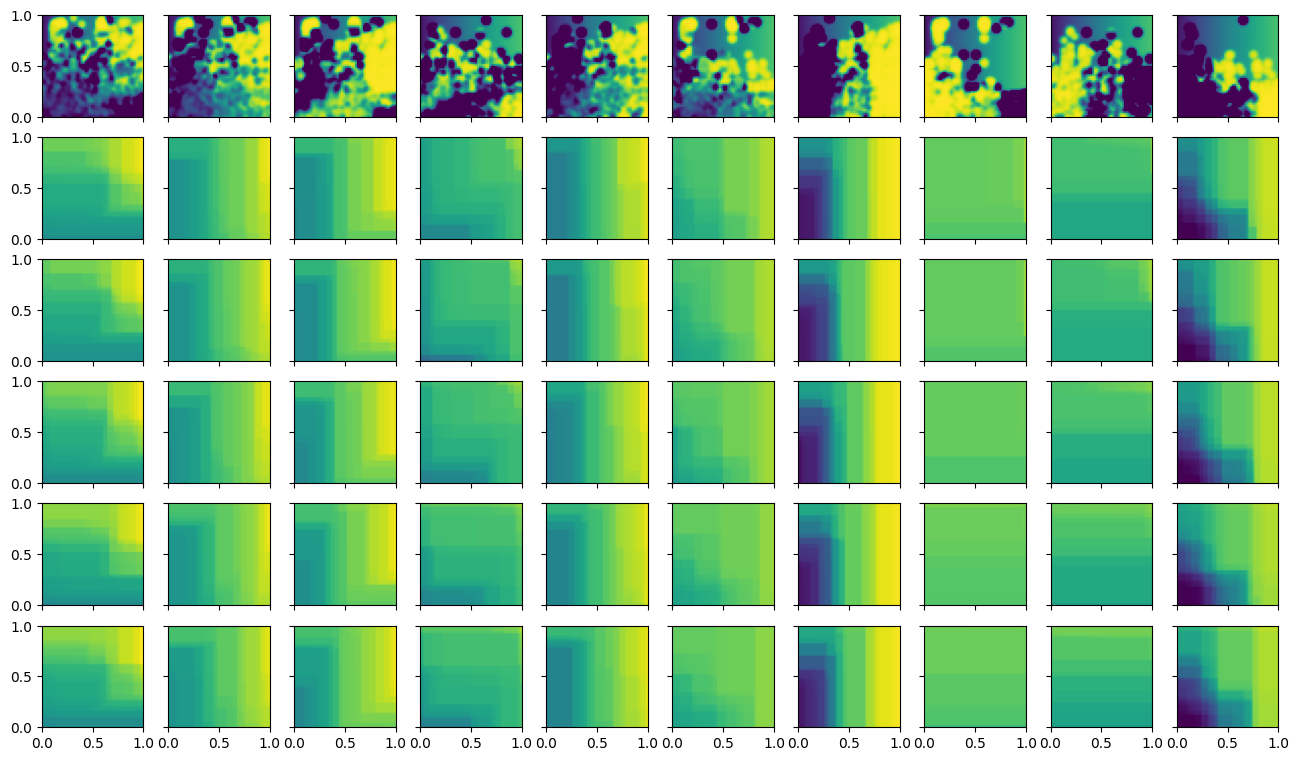

In [ ]:
args = default_args | {
    "conf_range": (0.5, 1),
    "cert_noise_conc": 100,
    "train_iterations": 1000,
    "prior_weights": (0.0, 1.0),
    "plot_axes": {
        "bin_accuracy": 0
    },
}

r, c = 6, 10
fig, ax = plt.subplots(r, c, figsize=(1.5*c + 1, 1.5*r + .25), sharex=True, sharey=True)
axes = (a for a in ax.T)
def plot(axes, args):
    plot_stuff(next(axes), l_correct, l_correct + True, **args)
    plot_stuff(next(axes), g_correct, g_correct + True, **args)
    plot_stuff(next(axes), g_correct, l_correct, **args)
    plot_stuff(next(axes), g_correct, l_incorrect, **args)
    plot_stuff(next(axes), g_correct, l_predicts_present, **args)
    plot_stuff(next(axes), g_correct, l_predicts_absent, **args)
    plot_stuff(next(axes), g_correct, l_predicts_present * l_correct, **args)
    plot_stuff(next(axes), g_correct, l_predicts_absent * l_correct, **args)
    plot_stuff(next(axes), g_correct, l_predicts_present * l_incorrect, **args)
    plot_stuff(next(axes), g_correct, l_predicts_absent * l_incorrect, **args)

plot(axes, args)

for i, w in enumerate([0.0, 0.1, 0.5, 0.9, 1.0]):
    plot(
        axes=(a for a in ax.T),
        args=args | {"prior_weights": (w, 1 - w), "plot_axes": {"mono_certainty": 1 + i}}
    )

plt.show()

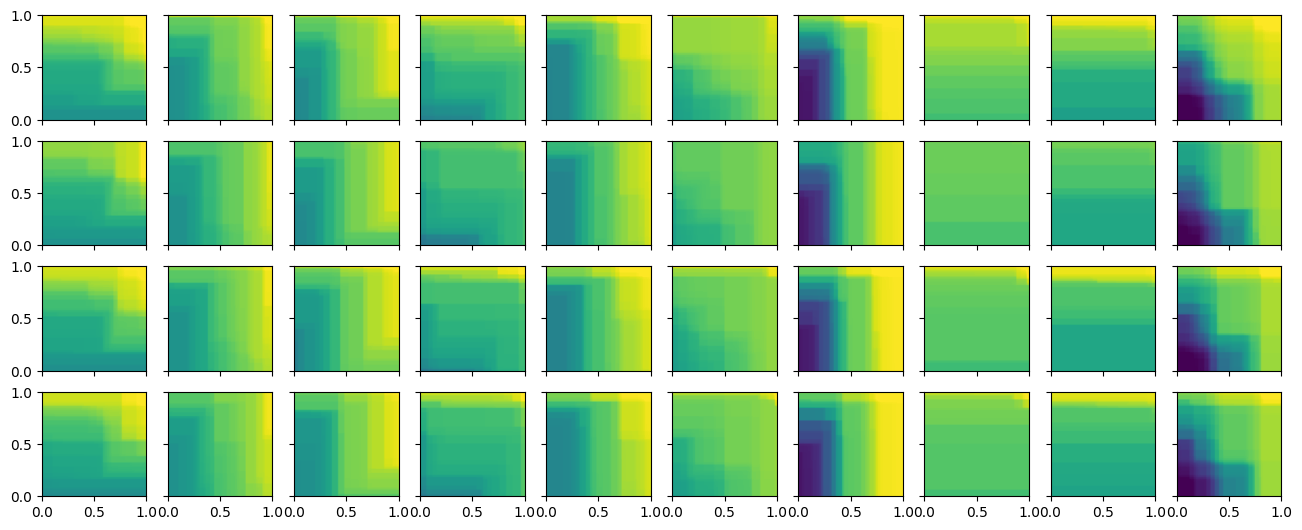

In [ ]:
args = default_args | {
    "conf_range": (0.5, 1),
    "cert_noise_conc": 100,
    "train_iterations": 1000,
    "prior_weights": (0.0, 1.0),
    "plot_axes": {
        "bin_accuracy": 0
    },
}

r, c = 4, 10
fig, ax = plt.subplots(r, c, figsize=(1.5*c + 1, 1.5*r + .25), sharex=True, sharey=True)
axes = (a for a in ax.T)
def plot(axes, args):
    plot_stuff(next(axes), l_correct, l_correct + True, **args)
    plot_stuff(next(axes), g_correct, g_correct + True, **args)
    plot_stuff(next(axes), g_correct, l_correct, **args)
    plot_stuff(next(axes), g_correct, l_incorrect, **args)
    plot_stuff(next(axes), g_correct, l_predicts_present, **args)
    plot_stuff(next(axes), g_correct, l_predicts_absent, **args)
    plot_stuff(next(axes), g_correct, l_predicts_present * l_correct, **args)
    plot_stuff(next(axes), g_correct, l_predicts_absent * l_correct, **args)
    plot_stuff(next(axes), g_correct, l_predicts_present * l_incorrect, **args)
    plot_stuff(next(axes), g_correct, l_predicts_absent * l_incorrect, **args)

import itertools as it
row = it.count()

plot(axes, args)
plot(
    axes=(a for a in ax.T),
    args=args | {"prior_weights": (w, 1 - w), "plot_axes": {"mono_certainty": next(row)}, "conf_models": passthru_conf_models}
)
plot(
    axes=(a for a in ax.T),
    args=args | {"prior_weights": (w, 1 - w), "plot_axes": {"mono_certainty": next(row)}, "conf_models": g_platt_conf_models}
)
plot(
    axes=(a for a in ax.T),
    args=args | {"prior_weights": (w, 1 - w), "plot_axes": {"mono_certainty": next(row)}, "conf_models": g_iso_conf_models}
)
plot(
    axes=(a for a in ax.T),
    args=args | {"prior_weights": (w, 1 - w), "plot_axes": {"mono_certainty": next(row)}, "conf_models": g_iso_platt_conf_models}
)

plt.show()

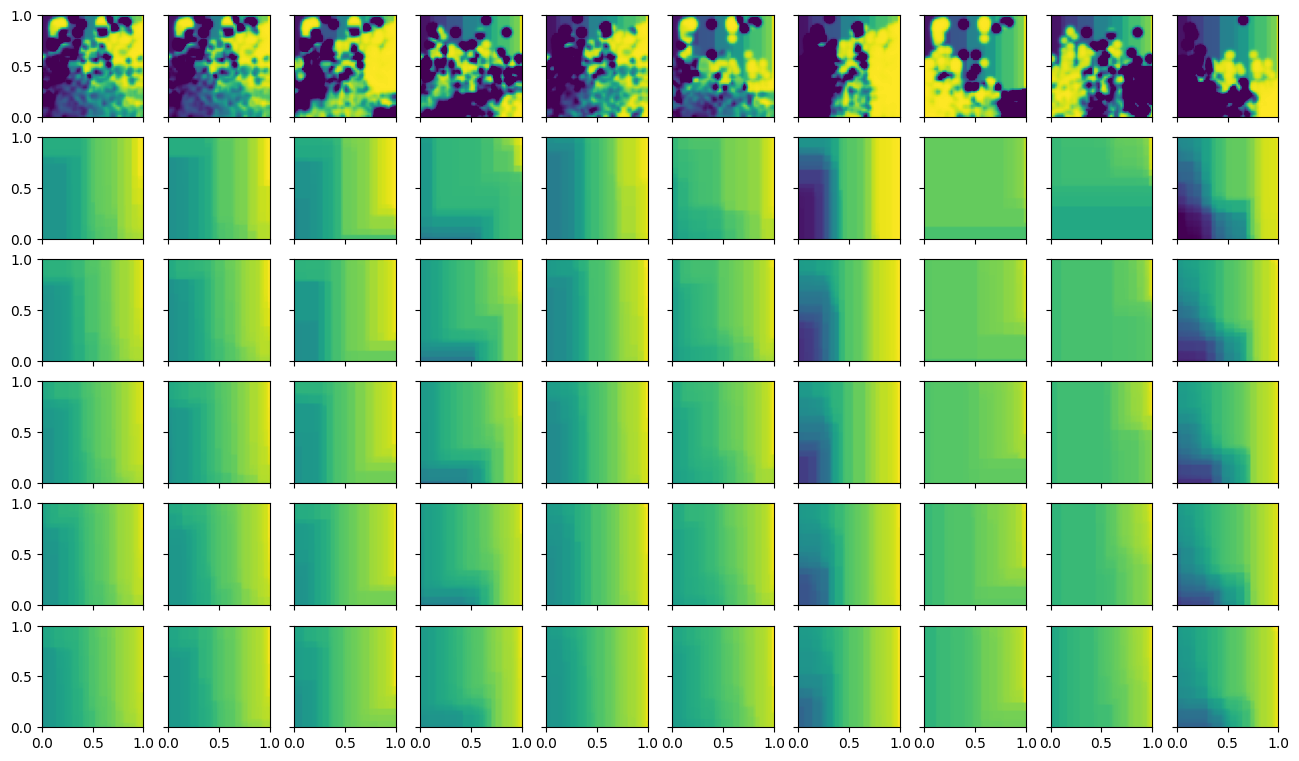

In [ ]:
args = default_args | {
    "conf_range": (0.5, 1),
    "cert_noise_conc": 100,
    "train_iterations": 1000,
    "prior_weights": (0.0, 1.0),
    "plot_axes": {
        "bin_accuracy": 0
    },
}

r, c = 6, 10
fig, ax = plt.subplots(r, c, figsize=(1.5*c + 1, 1.5*r + .25), sharex=True, sharey=True)
axes = (a for a in ax.T)
def plot(axes, args):
    plot_stuff(next(axes), l_correct, True, **args)
    plot_stuff(next(axes), g_correct, True, **args)
    plot_stuff(next(axes), g_correct, l_correct, **args)
    plot_stuff(next(axes), g_correct, l_incorrect, **args)
    plot_stuff(next(axes), g_correct, l_predicts_present, **args)
    plot_stuff(next(axes), g_correct, l_predicts_absent, **args)
    plot_stuff(next(axes), g_correct, l_predicts_present * l_correct, **args)
    plot_stuff(next(axes), g_correct, l_predicts_absent * l_correct, **args)
    plot_stuff(next(axes), g_correct, l_predicts_present * l_incorrect, **args)
    plot_stuff(next(axes), g_correct, l_predicts_absent * l_incorrect, **args)

plot(axes, args)

for i, b in enumerate([1, 25, 50, 100, 200]):
    plot(
        axes=(a for a in ax.T),
        args=args | {"base_bin_counts": b, "plot_axes": {"mono_certainty": 1 + i}}
    )

plt.show()

In [ ]:
from sklearn import metrics as skmetrics
s = m #[l_correct]
print("Llama2 certainty")
print(skmetrics.log_loss(s["correct_l"], passthru_conf_models[0](s[["certainty_l"]].to_numpy())))
print(skmetrics.log_loss(s["correct_l"], g_iso_conf_models[0](s[["certainty_l"]].to_numpy())))
print(skmetrics.log_loss(s["correct_l"], g_platt_conf_models[0](s[["certainty_l"]].to_numpy())))
print(skmetrics.log_loss(s["correct_l"], g_iso_platt_conf_models[0](s[["certainty_l"]].to_numpy())))
print(skmetrics.log_loss(s["correct_l"], g_bleedthru_iso_conf_models[0](s[["certainty_l"]].to_numpy())))

print("\nGPT4 certainty")
print(skmetrics.log_loss(s["correct_g"], passthru_conf_models[1](s[["certainty_g"]].to_numpy())))
print(skmetrics.log_loss(s["correct_g"], g_iso_conf_models[1](s[["certainty_g"]].to_numpy())))
print(skmetrics.log_loss(s["correct_g"], g_platt_conf_models[1](s[["certainty_g"]].to_numpy())))
print(skmetrics.log_loss(s["correct_g"], g_iso_platt_conf_models[1](s[["certainty_g"]].to_numpy())))
print(skmetrics.log_loss(s["correct_g"], g_bleedthru_iso_conf_models[1](s[["certainty_g"]].to_numpy())))

print("\nGPT4 using Llama2 certainty")
print(skmetrics.log_loss(s["correct_g"], passthru_conf_models[0](s[["certainty_l"]].to_numpy())))
print(skmetrics.log_loss(s["correct_g"], g_iso_conf_models[0](s[["certainty_l"]].to_numpy())))
print(skmetrics.log_loss(s["correct_g"], g_platt_conf_models[0](s[["certainty_l"]].to_numpy())))
print(skmetrics.log_loss(s["correct_g"], g_iso_platt_conf_models[0](s[["certainty_l"]].to_numpy())))
print(skmetrics.log_loss(s["correct_g"], g_bleedthru_iso_conf_models[0](s[["certainty_l"]].to_numpy())))

Llama2 certainty
0.6656438237460061
0.6891794088908905
0.6898749283256314
0.6890644165747442
0.6846614277654531

GPT4 certainty
0.6412484333664641
0.6226211074372983
0.6264155879416335
0.622800458981788
0.6228869355346334

GPT4 using Llama2 certainty
0.6747646542452739
0.6467421493270847
0.6515409804540309
0.6469578285609795
0.6473341423219034


TODO:
- Compare these 2d conf functions with just using certainty_g

KeyError: 'im_args'

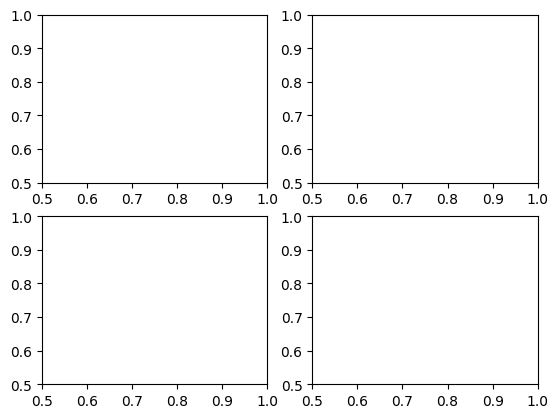

In [ ]:
res = 50

from multiisotonic.multiisotonic import MultiIsotonicRegressor as MIR
mir2 = MIR(1)
m2 = m.sample(1000)
mir2.fit(m2[["certainty_l", "certainty_g"]], m2["correct_g"])
certainty2_map = mir2.predict(np.mgrid[0:1:(1/res), 0:1:(1/res)].reshape(2, -1).T).reshape(res, res)

fig, ax = plt.subplots(2, 2)
for c in ax:
    for a in c:
        a.set_xlim(0.5, 1)
        a.set_ylim(0.5, 1)

ax[0][0].imshow(certainty2_map, vmin=0, vmax=1, **args["im_args"])

In [ ]:
def empirical_conf(correct, subset: pd.Series, binned_correct=None, binned_incorrect=None, base_bin_counts=1, conf_range=(0, 1), kernel=(1, 1), im_args={}):
    binned_correct, binned_incorrect = make_heatmaps(correct, subset)
    binned_correct = sp.ndimage.gaussian_filter(binned_correct, kernel, mode='nearest')
    binned_incorrect = sp.ndimage.gaussian_filter(binned_incorrect, kernel, mode='nearest')

    prior_correct = sum(correct * subset) / (sum(correct * subset) + sum(~correct * subset))
    prior_incorrect = 1 - prior_correct
    correct_density = base_bin_counts * prior_correct + binned_correct
    incorrect_density = base_bin_counts * prior_incorrect + binned_incorrect
    conf = correct_density / (correct_density + incorrect_density)
    return conf

In [ ]:
np.mgrid[0:1:(1/res), 0:1:(1/res)].shape

(2, 50, 50)

In [ ]:
np.array(conf.flatten())

(2500,)

In [ ]:
subset = l_correct + True
conf = empirical_conf(l_correct, subset, **args)

res = 50
m2 = m[subset].sample(1000, replace=True)

cert_grid = np.mgrid[0:1:(1/res), 0:1:(1/res)].reshape(2, -1).T

xgboost = HistGradientBoostingRegressor(
    loss="squared_error",
    # l2_regularization=1,
    # early_stopping=True,
    min_samples_leaf=1,
    max_iter=10000,
    monotonic_cst=np.array([1, 1], dtype=int)
).fit(cert_grid, np.array(conf.flatten()))

# certainty2_map = xgboost.predict_proba(np.mgrid[0:1:(1/res), 0:1:(1/res)].reshape(2, -1).T)[:,1].reshape(res, res)

# certainty2_smooth = sp.ndimage.gaussian_filter(certainty2_map, kernel, mode='nearest')
# axes[2].imshow(certainty2_smooth, vmin=0, vmax=1, **im_args)

In [ ]:
xgboost.predict(cert_grid).shape

(2500,)

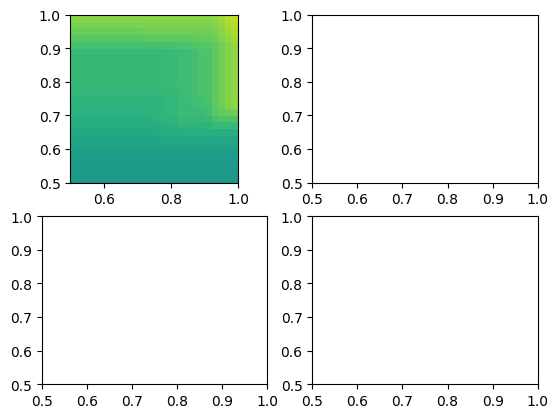

In [ ]:
certainty2_map = xgboost.predict(cert_grid).reshape(res, res)
# certainty2_smooth = sp.ndimage.gaussian_filter(certainty2_map, args["kernel"], mode='nearest')

fig, ax = plt.subplots(2, 2)
for c in ax:
    for a in c:
        a.set_xlim(0.5, 1)
        a.set_ylim(0.5, 1)

ax[0][0].imshow(certainty2_map, vmin=0, vmax=1, **args["im_args"])


/home/mielliott/.local/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but HistGradientBoostingRegressor was fitted without feature names
  warnings.warn(


<Axes: >

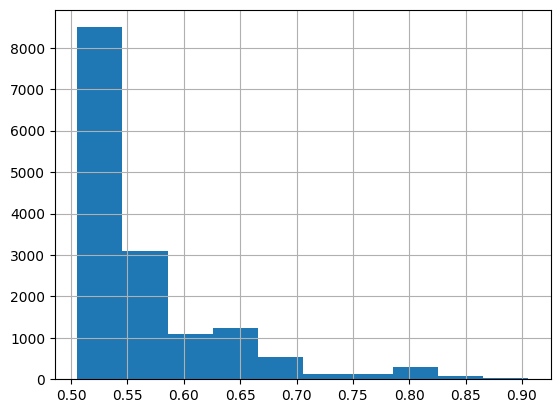

In [ ]:
pd.Series(xgboost.predict(m[["certainty_l", "certainty_g"]])).hist()

In [ ]:
m[["certainty_l", "certainty_g"]]

,certainty_l,certainty_g
0,0.462380,0.555690
1,0.580389,0.584920
2,0.531105,0.819927
3,0.530090,0.627946
4,0.629297,0.783191
...,...,...
15095,0.572878,0.783191
15096,0.647384,0.652319
15097,0.595328,0.526932
15098,0.514595,0.825304


array([[<Axes: title={'center': 'certainty_l'}>,
        <Axes: title={'center': 'certainty_g'}>]], dtype=object)

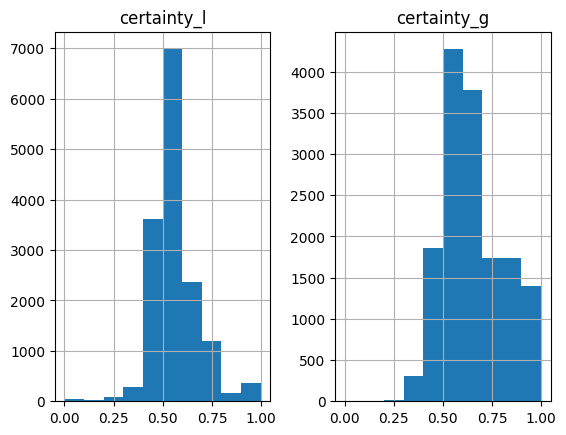

In [ ]:
m[["certainty_l", "certainty_g"]].hist()

In [ ]:
m["correct_g"].mean()

0.6350331125827815

<Axes: >

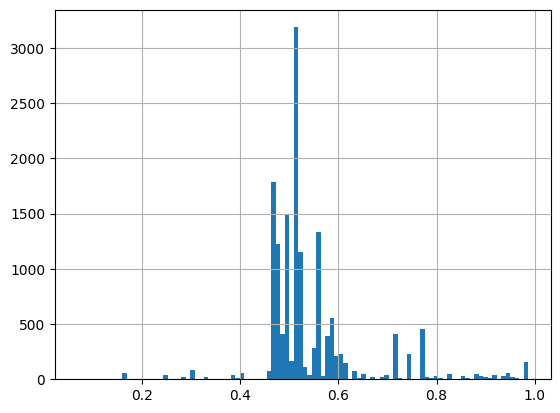

In [ ]:

pd.Series(cert_xgb).hist(bins=100)

In [ ]:
cert_xgb

array([[0.52717551, 0.47282449],
       [0.47026306, 0.52973694],
       [0.48170352, 0.51829648],
       ...,
       [0.46453479, 0.53546521],
       [0.48781103, 0.51218897],
       [0.48036199, 0.51963801]])

In [ ]:
from multiisotonic.multiisotonic import MultiIsotonicRegressor as MIR
mir = MIR(1)
mir.fit(m[["certainty_l", "certainty_g"]], m["correct_g"])

MultiIsotonicRegressor()

In [ ]:
certainty2 = mir.predict(m[["certainty_l", "certainty_g"]])

<Axes: >

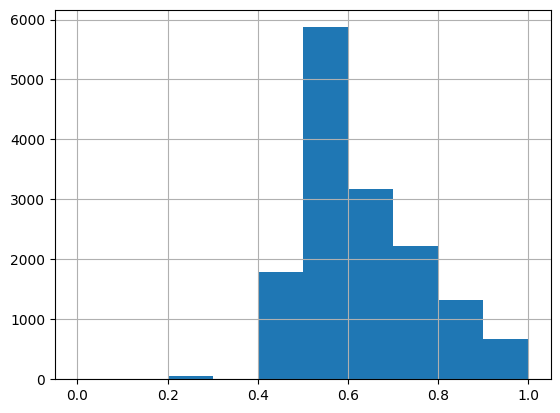

In [ ]:
pd.Series(certainty2).hist()
# pd.Series(m["certainty_g"]).hist()
# pd.Series(m["certainty_l"]).hist()

In [ ]:
c_bins, i_bins = make_heatmaps(g_correct, True)

In [ ]:
c_bins

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  2.,  0.,  8.],
       [ 0.,  0.,  0., ...,  1.,  1., 12.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [ ]:
np.mgrid[0:1:(1/res), 0:1:(1/res)].reshape(2, -1).shape

(2, 2500)

In [ ]:
res = 200
certainty2_map = mir.predict(np.mgrid[0:1:(1/res), 0:1:(1/res)].reshape(2, -1).T).reshape(res, res)

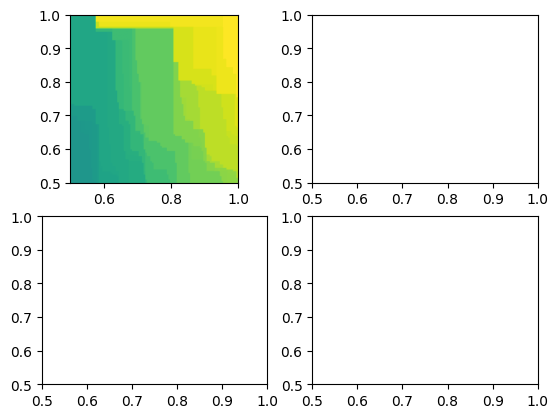

In [ ]:
fig, ax = plt.subplots(2, 2)
for c in ax:
    for a in c:
        a.set_xlim(0.5, 1)
        a.set_ylim(0.5, 1)

ax[0][0].imshow(certainty2_map, vmin=0, vmax=1, **args["im_args"])

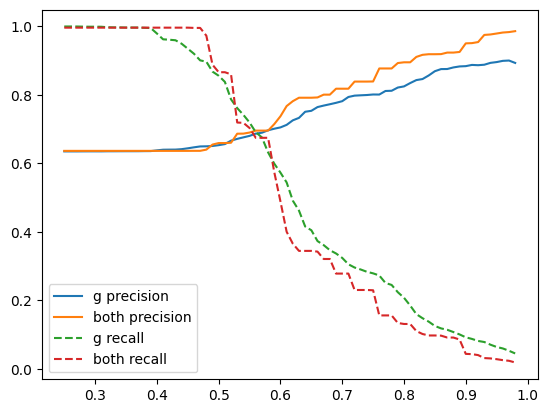

In [ ]:
t = pd.Series(np.arange(0.25, .99, 0.01))
plt.plot(t, t.map(lambda t: m[m["certainty_g"] > t]["correct_g"].mean()), label="g precision")
plt.plot(t, t.map(lambda t: m[certainty2 > t]["correct_g"].mean()), label="both precision")
plt.plot(t, t.map(lambda t: m[m["certainty_g"] > t]["correct_g"].index.size / m.index.size), label="g recall", linestyle="--")
plt.plot(t, t.map(lambda t: m[certainty2 > t]["correct_g"].index.size / m.index.size), label="both recall", linestyle="--")
plt.legend()
plt.show()

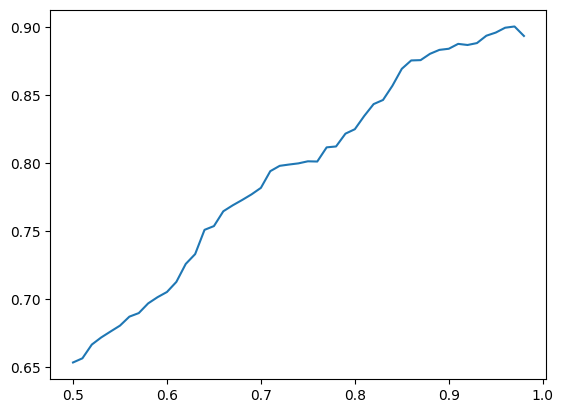

In [ ]:
t = pd.Series(np.arange(0.5, .99, 0.01))
plt.plot(t, t.map(lambda t: m[m["certainty_g"] > t]["correct_g"].mean()))

In [ ]:
m["certainty_l"].corr(m["certainty_g"])

0.2833639529246542

array([[<Axes: title={'center': 'certainty_l'}>,
        <Axes: title={'center': 'certainty_g'}>]], dtype=object)

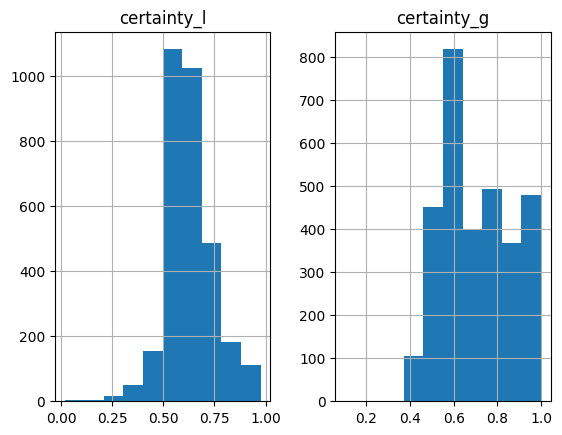

In [ ]:
m[l_predicts_present * l_correct][["certainty_l", "certainty_g"]].hist()